# SDSS- PS1 - ZTF filters 

Code to plot SDSS, PS1, ZTF photometric filters. Most of the code is inherited from https://github.com/suberlak/epyc-notebooks/blob/master/ZTF_SDSS_offsets_2022.ipynb
    
An example  illustration of PS1, SDSS  transmission curves is included in this paper https://academic.oup.com/mnras/article-abstract/521/2/2954/7076334?redirectedFrom=fulltext 
https://arxiv.org/abs/2303.05844 , Fig.1 : 

<img src="Sun_2023_Fig1.png" alt="Alternative text" />
    
We want to make something like that, but adding the ZTF filter information.

In [ ]:
!pip install astroML

In [13]:
from matplotlib import pyplot as plt
from astroML.datasets import fetch_sdss_filter, fetch_vega_spectrum

This plots the SDSS filter and the Vega spectrum. The code is borrowed from http://www.astroml.org/book_figures/appendix/fig_sdss_filters.html 

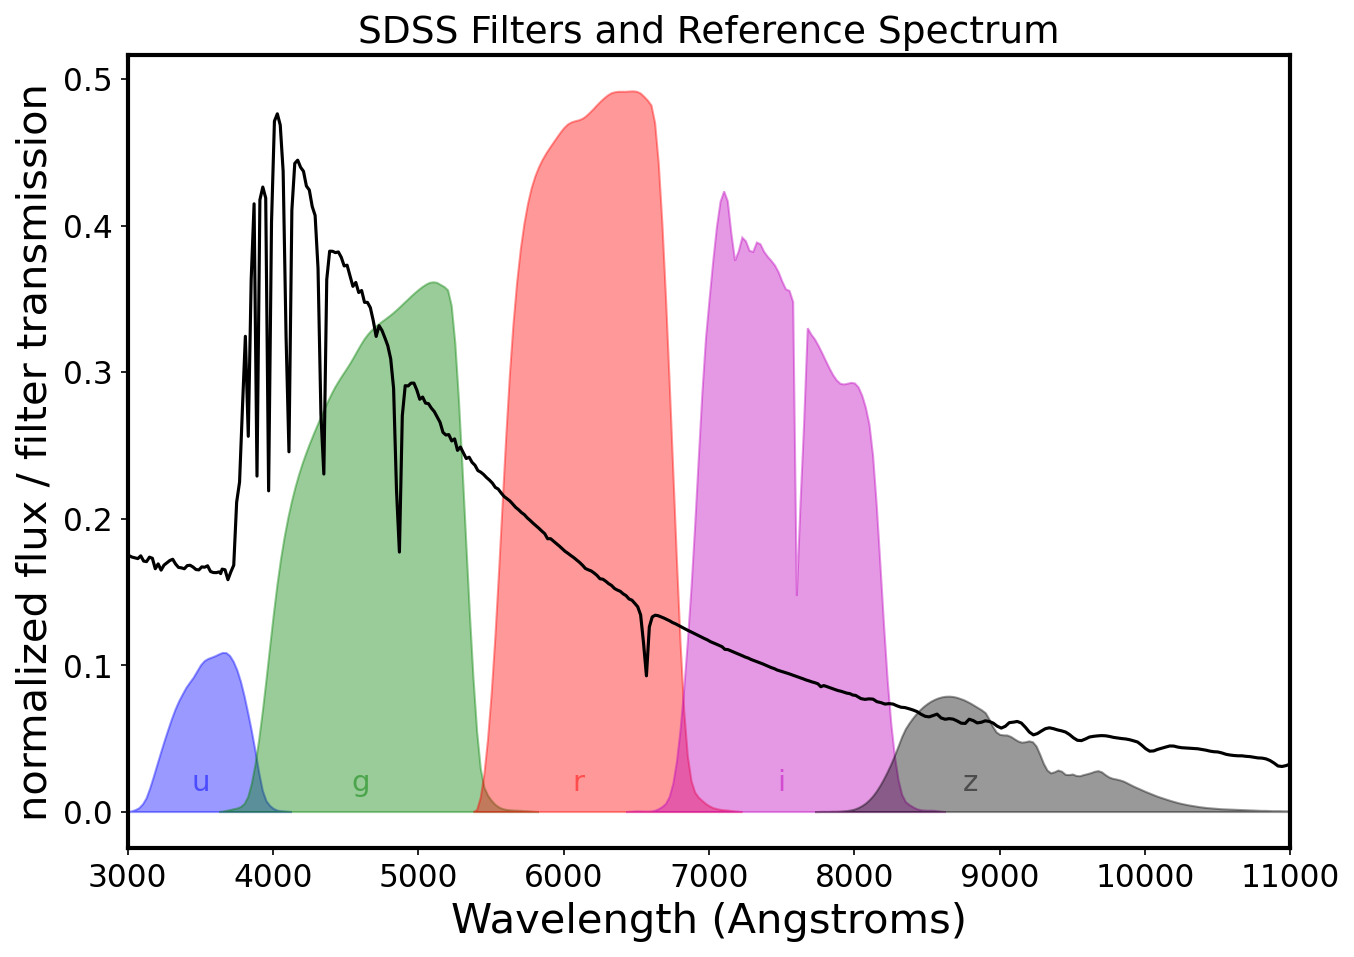

In [14]:
# Set up figure and axes
fig = plt.figure(figsize=(10, 7), dpi=150)
ax = fig.add_subplot(111)

#----------------------------------------------------------------------
# Fetch and plot the Vega spectrum
spec = fetch_vega_spectrum()
lam = spec[0]
spectrum = spec[1] / 2.1 / spec[1].max()
ax.plot(lam, spectrum, '-k')

#------------------------------------------------------------
# Fetch and plot the five filters
text_kwargs = dict(ha='center', va='center', alpha=0.5, fontsize=14)

for f, c, loc in zip('ugriz', 'bgrmk', [3500, 4600, 6100, 7500, 8800]):
    data = fetch_sdss_filter(f)
    ax.fill(data[0], data[1], ec=c, fc=c, alpha=0.4)
    ax.text(loc, 0.02, f, color=c, **text_kwargs)

ax.set_xlim(3000, 11000)

ax.set_title('SDSS Filters and Reference Spectrum')
ax.set_xlabel('Wavelength (Angstroms)')
ax.set_ylabel('normalized flux / filter transmission')

plt.show()


This obtains the ZTF filter information:

In [17]:
!git clone https://github.com/ZwickyTransientFacility/ztf_information 

Cloning into 'ztf_information'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 46 (delta 0), reused 1 (delta 0), pack-reused 42
Receiving objects: 100% (46/46), 357.17 KiB | 1.48 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [18]:
ls ztf_information 

LICENSE              README.md            filter_transmission/
QE/                  field_grid/


In [19]:
gpath = 'ztf_information/filter_transmission/ZTF_g_band_test_data_pos1_0AOI.csv'
rpath = 'ztf_information/filter_transmission/ZTF_r_band_test_data_pos1_0AOI.csv'
ipath = 'ztf_information/filter_transmission/ztf_i_band.csv'
from astropy.table import Table
ztf_filters = {}
for fid, fpath in zip('gri', [gpath, rpath, ipath]): 
    ztf_filters[fid] = Table.read(fpath, format='ascii.no_header',
                    names=['lambda', 'transmission'])

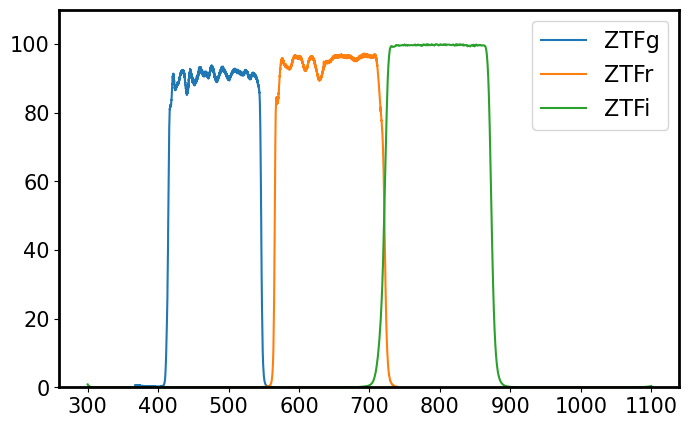

In [20]:
import matplotlib.pyplot as plt
from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18
fig,ax = plt.subplots(1,1,figsize=(8,5), dpi=100, facecolor='white')
for fid in 'gri':
    fdata = ztf_filters[fid]
    ax.plot(fdata['lambda'], fdata['transmission'], label=f'ZTF{fid}')
ax.set_ylim(0,110)
ax.legend(fontsize=16)

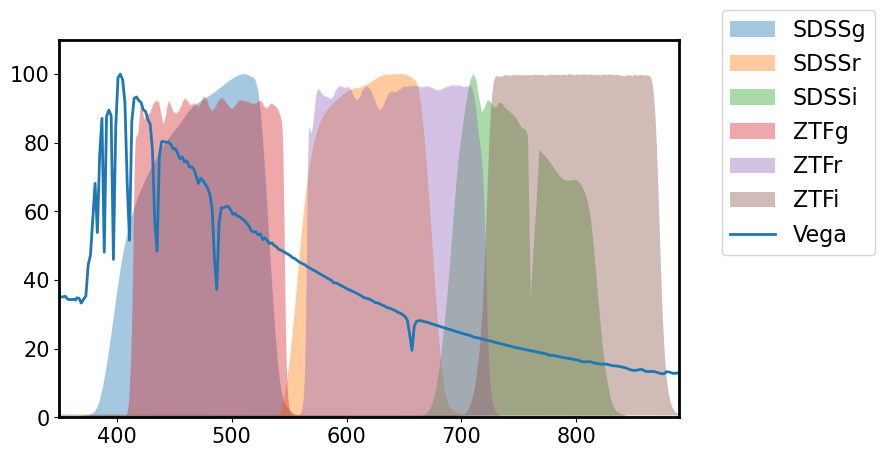

In [21]:
fig,ax = plt.subplots(1,1,figsize=(8,5), dpi=100,facecolor='white')
for fid in 'gri':
    data = fetch_sdss_filter(fid)
    f = 100/max(data[1])
    ax.fill(data[0]/10., f*data[1], alpha=0.4, label=f'SDSS{fid}')


for fid in 'gri':
    fdata = ztf_filters[fid]
    y =  fdata['transmission'].data
    ax.fill(fdata['lambda'],y,alpha=0.4,label=f'ZTF{fid}')

f = 100/max(spec[1])
ax.plot(spec[0]/10.,f*spec[1], lw=2, ls='-', label='Vega')
ax.set_xlim(350, 890)
ax.set_ylim(0,110)
plt.legend(fontsize=16,bbox_to_anchor=[1.05,0.4])

Add PS1 filter information:

Plot the Quasar composite spectrum  at `z=1.2`  instead of the Vega spectrum. It can be  downloaded from https://iopscience.iop.org/article/10.1086/321167/fulltext/:



In [1]:
! wget -O qso_comp.txt https://iopscience.iop.org/article/10.1086/321167/fulltext/datafile1.txt?doi=10.1086/321167  

--2023-07-07 14:56:46--  https://iopscience.iop.org/article/10.1086/321167/fulltext/datafile1.txt?doi=10.1086/321167
Resolving iopscience.iop.org... 141.226.253.39
Connecting to iopscience.iop.org|141.226.253.39|:443... connected.
HTTP request sent, awaiting response... 200 
Length: unspecified
Saving to: 'qso_comp.txt'

qso_comp.txt            [  <=>               ] 153.02K   337KB/s    in 0.5s    

2023-07-07 14:56:49 (337 KB/s) - 'qso_comp.txt' saved [156693]



In [27]:
import pandas as pd
fpath = 'qso_comp.txt'
spec = pd.read_csv(fpath, skiprows=23, header=None, sep=" ", skipinitialspace=True)
spec.columns = ['Wave', 'FluxD', 'e_FluxD']

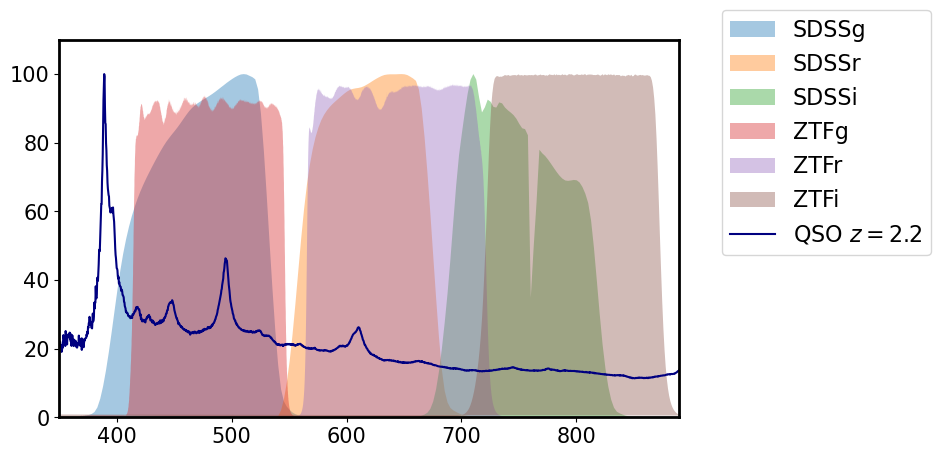

In [39]:
import astropy.units as u

fig,ax = plt.subplots(1,1,figsize=(8,5), dpi=100,facecolor='white')
for fid in 'gri':
    data = fetch_sdss_filter(fid)
    f = 100/max(data[1])
    ax.fill(data[0]/10., f*data[1], alpha=0.4, label=f'SDSS{fid}')


for fid in 'gri':
    fdata = ztf_filters[fid]
    y =  fdata['transmission'].data
    ax.fill(fdata['lambda'],y,alpha=0.4,label=f'ZTF{fid}')



redshift = 2.2
lambda_rest = spec['Wave'].values*u.Angstrom
lambda_obs=(redshift+1)*lambda_rest

ax.plot(lambda_obs/10,100*spec['FluxD']/spec['FluxD'].max(),
        label=r'QSO $z={}$'.format(redshift),c='navy', ls='-',)
ax.set_xlim(350, 890)
ax.set_ylim(0,110)
plt.legend(fontsize=16,bbox_to_anchor=[1.05,0.4])

Could also plot a specific quasar spectrum obtained in the following way, but it's not necessary:

In [41]:
from astroquery.mast import Mast
from astroquery.sdss import SDSS
name = '172322.31+550413.8'
coords = Mast.resolve_object(f'SDSSJ{name}')
xid = SDSS.query_region(coords, radius='5 arcsec', spectro=True)
sdss_spectra = SDSS.get_spectra(matches=xid)

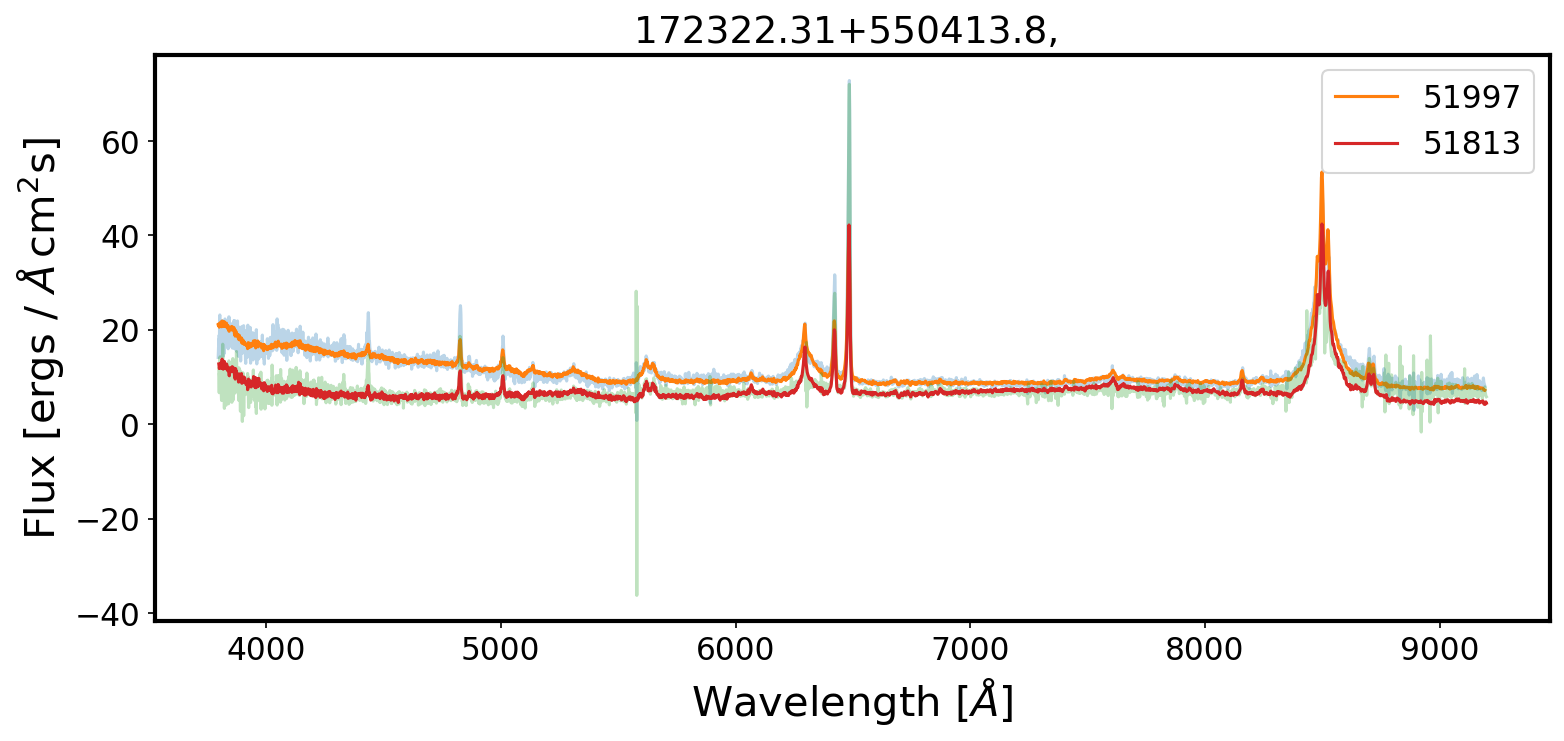

In [46]:
import numpy as np
sp = sdss_spectra
fig,ax=  plt.subplots(1,1, figsize=(12,5), facecolor='w', dpi=150)
for i in range(2):
    mjd = sp[i][0].header['MJD']
    
    spec = sp[i][1].data
    
    ax.plot(np.power(10,spec['loglam']), spec['flux'], alpha=0.3)
    ax.plot(np.power(10,spec['loglam']), spec['model'], label=mjd)
    
ax.set_title(f'{name}, ')#mjd={mjd}',)
ax.set_xlabel('Wavelength '+ r'$[\AA]$')
ax.set_ylabel('Flux [ergs / '+r'$\AA \, $cm$^{2}$s]')
ax.legend()